In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
# font_manager.findSystemFonts(fontpaths = None, fontext = "ttf")
font_path  = "C:\Windows\Fonts\malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from sklearn.preprocessing import LabelEncoder

In [2]:
data_1 = pd.read_csv("data/여가시간 및 생활 중요성 인식.csv")
data_2 = pd.read_csv("data/여가시간 및 생활 중요성 인식_2.csv")
data_3 = pd.read_csv("data/여가시간 및 생활 중요성 인식_3.csv")
data_4 = pd.read_csv("data/여가시간 및 생활 중요성 인식_4.csv")
data = pd.concat([data_1, data_2, data_3, data_4], axis=0)
data = data.rename(columns = {
    "SEXDSTN_FLAG_CD": "성별",
    "AGRDE_FLAG_NM" : "연령대",
    "ANSWRR_OC_AREA_NM" : "지역",
    "HSHLD_INCOME_DGREE_NM" : "소득",
    "IMPRT_DGREE_RECOG_TY" : "중요도",
    "LSR_TIME_USE_PURPS_RN1_VALUE" : "여가목적_1",
    "LSR_TIME_USE_PURPS_RN2_VALUE" : "여가목적_2",
    "WORKDAY_DAY_AVRG_LSR_TIME_VALUE" : "평일여가시간",
    "WKEND_DAY_AVRG_LSR_TIME_VALUE" : "주말여가시간"
})
data = data[data.지역 == "서울특별시"]
data = data[["성별", "연령대", "소득", "중요도", "여가목적_1", "여가목적_2", "평일여가시간", "주말여가시간"]]

data_2 = data.copy()
data_2.loc[data_2.중요도 == "매우 중요하다", "중요도"] = 5
data_2.loc[data_2.중요도 == "중요한 편이다", "중요도"] = 4
data_2.loc[data_2.중요도 == "보통이다", "중요도"] = 3
data_2.loc[data_2.중요도 == "중요하지 않은 편이다", "중요도"] = 2

# 라벨링
le = LabelEncoder()
label = list(set(data_2.여가목적_1)) + list(set(data_2.여가목적_2))
le.fit(label)
data_2.여가목적_1 = le.transform(data_2.여가목적_1)
data_2.여가목적_2 = le.transform(data_2.여가목적_2)

le_2 = LabelEncoder()
le_2.fit(data_2.소득)
data_2.소득 = le_2.transform(data_2.소득)

In [3]:
le.classes_

array(['가족-지인 등과 시간을 보내기 위해', '건강 관리를 위해', '기타', '남는 시간을 보내기 위해',
       '대인 관계-교제를 위해', '마음의 안정-휴식을 위해', '스트레스 해소를 위해', '없음', '자기 계발을 위해',
       '자기만족-즐거움을 위해'], dtype='<U19')

In [4]:
data.isnull().sum()

성별        0
연령대       0
소득        0
중요도       0
여가목적_1    0
여가목적_2    0
평일여가시간    0
주말여가시간    0
dtype: int64

In [5]:
data_2.groupby(['연령대']).count() 

,성별,소득,중요도,여가목적_1,여가목적_2,평일여가시간,주말여가시간
연령대,,,,,,,
20대,63,63,63,63,63,63,63
30대,68,68,68,68,68,68,68
40대,91,91,91,91,91,91,91
50대,89,89,89,89,89,89,89
60대,103,103,103,103,103,103,103


In [6]:
data.groupby(['성별']).count() 

,연령대,소득,중요도,여가목적_1,여가목적_2,평일여가시간,주말여가시간
성별,,,,,,,
F,208,208,208,208,208,208,208
M,206,206,206,206,206,206,206


# 중요도

In [7]:
data_2.groupby(['중요도']).count() 

,성별,연령대,소득,여가목적_1,여가목적_2,평일여가시간,주말여가시간
중요도,,,,,,,
2,2,2,2,2,2,2,2
3,88,88,88,88,88,88,88
4,228,228,228,228,228,228,228
5,96,96,96,96,96,96,96


Text(0.5, 1.0, '여가 생활 중요도 인식 - 연령별')

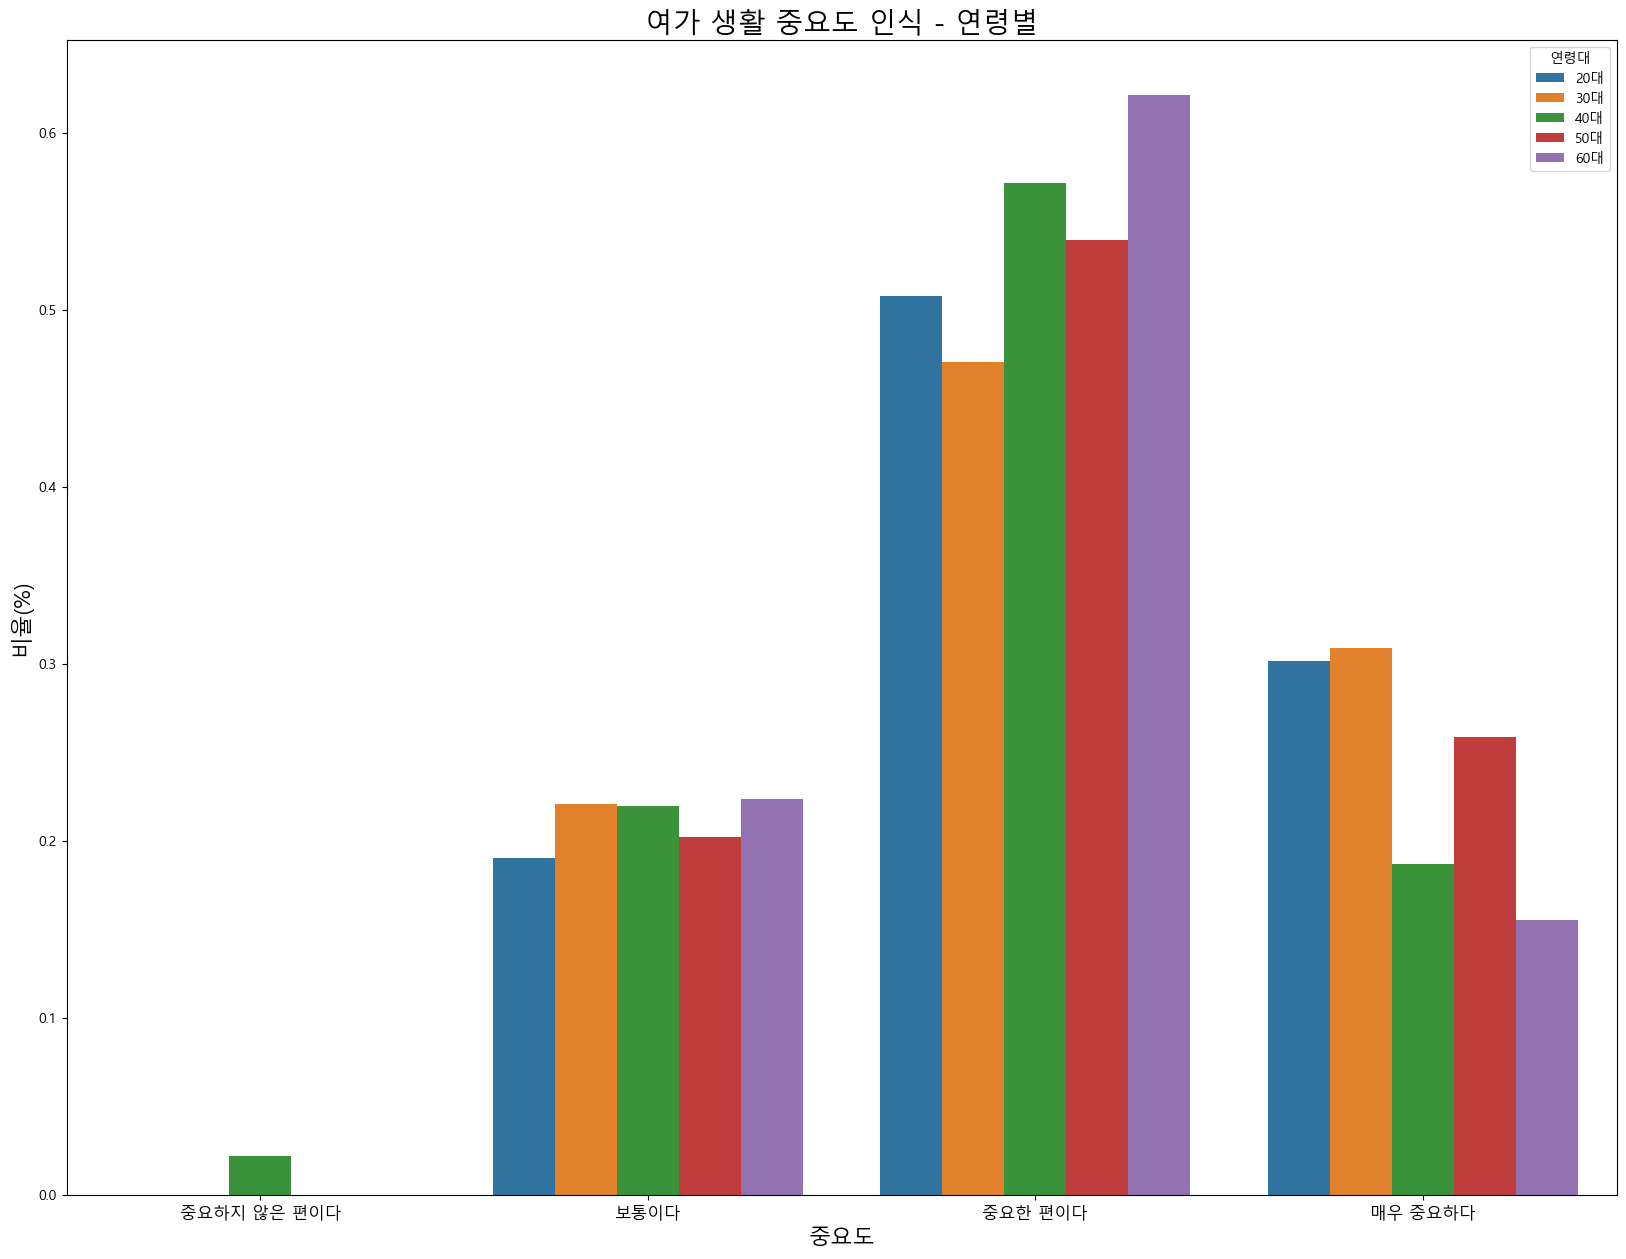

In [9]:
# 각 연령대별 비율로 계산
data_Age = pd.DataFrame(data_2.groupby(['연령대']).size()).reset_index().rename(columns = {0:"total"})
data_importance = data_2[["연령대", "중요도"]]
data_importance = pd.DataFrame(data_importance.groupby(['연령대']).value_counts()).reset_index()
data_importance = data_importance.rename(columns = {0 : "value"})
data_importance.loc[data_importance.연령대=="20대","value"] = \
                    data_importance[data_importance.연령대=="20대"].value/data_Age[data_Age.연령대 == "20대"].total.values
data_importance.loc[data_importance.연령대=="30대","value"] = \
                    data_importance[data_importance.연령대=="30대"].value/data_Age[data_Age.연령대 == "30대"].total.values
data_importance.loc[data_importance.연령대=="40대","value"] = \
                    data_importance[data_importance.연령대=="40대"].value/data_Age[data_Age.연령대 == "40대"].total.values
data_importance.loc[data_importance.연령대=="50대","value"] = \
                    data_importance[data_importance.연령대=="50대"].value/data_Age[data_Age.연령대 == "50대"].total.values
data_importance.loc[data_importance.연령대=="60대","value"] = \
                    data_importance[data_importance.연령대=="60대"].value/data_Age[data_Age.연령대 == "60대"].total.values

plt.figure(figsize=(20,15))
sns.barplot(x="중요도", y="value", hue = "연령대",data=data_importance)
plt.rc('ytick', labelsize=15) 
plt.xticks([0,1,2,3], ["중요하지 않은 편이다", "보통이다", "중요한 편이다", "매우 중요하다"], fontsize=12)
plt.xlabel("중요도", fontsize = 16)
plt.ylabel("비율(%)", fontsize = 16)
plt.title("여가 생활 중요도 인식 - 연령별", fontsize = 20)

# 여가 목적

In [252]:
le.classes_

array(['가족-지인 등과 시간을 보내기 위해', '건강 관리를 위해', '기타', '남는 시간을 보내기 위해',
       '대인 관계-교제를 위해', '마음의 안정-휴식을 위해', '스트레스 해소를 위해', '없음', '자기 계발을 위해',
       '자기만족-즐거움을 위해'], dtype='<U19')

In [254]:
data_2

,성별,연령대,소득,중요도,여가목적_1,여가목적_2,평일여가시간,주말여가시간
0,M,30대,1,3,6,0,2,3
1,F,40대,3,4,4,5,1,3
2,F,50대,2,5,0,4,10,12
3,M,40대,3,4,0,5,1,5
5,F,50대,0,4,9,1,1,1
...,...,...,...,...,...,...,...,...
509,M,50대,3,4,8,0,4,8
511,M,20대,4,3,9,6,1,5
514,M,50대,3,4,5,3,3,8
518,F,60대,2,4,1,8,3,10


Text(0.5, 1.0, '여가 생활 목적 1순위 - 연령별')

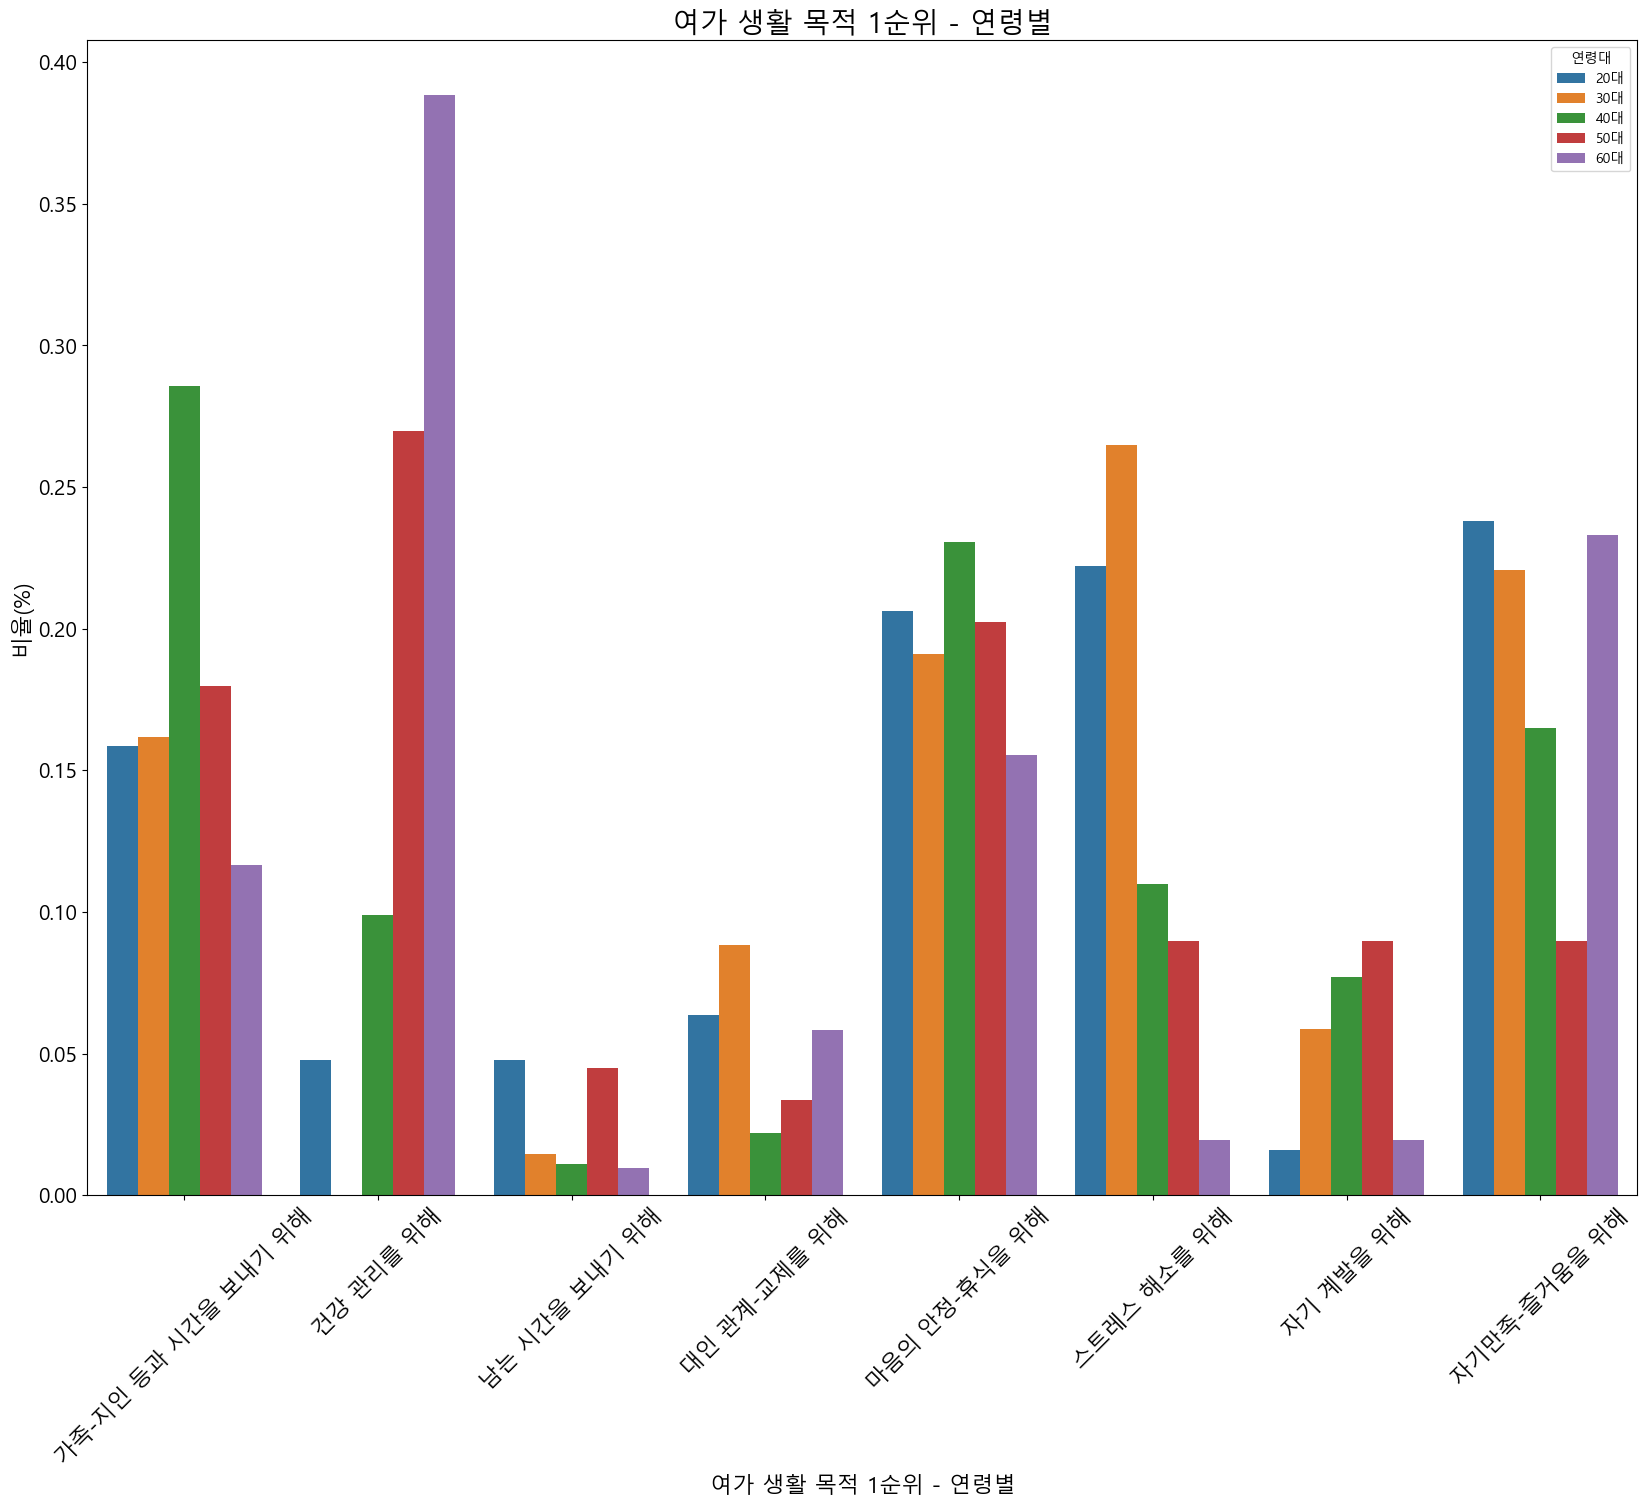

In [255]:
# 각 연령대별 비율로 계산
data_leisure_1 = data_2[["연령대", "여가목적_1"]]
data_leisure_1 = pd.DataFrame(data_leisure_1.groupby(['연령대']).value_counts()).reset_index()
data_leisure_1 = data_leisure_1.rename(columns = {0 : "value"})
data_leisure_1.loc[data_leisure_1.연령대=="20대","value"] = \
                        data_leisure_1[data_leisure_1.연령대=="20대"].value/data_Age[data_Age.연령대 == "20대"].total.values
data_leisure_1.loc[data_leisure_1.연령대=="30대","value"] = \
                        data_leisure_1[data_leisure_1.연령대=="30대"].value/data_Age[data_Age.연령대 == "30대"].total.values
data_leisure_1.loc[data_leisure_1.연령대=="40대","value"] = \
                        data_leisure_1[data_leisure_1.연령대=="40대"].value/data_Age[data_Age.연령대 == "40대"].total.values
data_leisure_1.loc[data_leisure_1.연령대=="50대","value"] = \
                        data_leisure_1[data_leisure_1.연령대=="50대"].value/data_Age[data_Age.연령대 == "50대"].total.values
data_leisure_1.loc[data_leisure_1.연령대=="60대","value"] = \
                        data_leisure_1[data_leisure_1.연령대=="60대"].value/data_Age[data_Age.연령대 == "60대"].total.values

x_name = ['가족-지인 등과 시간을 보내기 위해', '건강 관리를 위해', '남는 시간을 보내기 위해',
       '대인 관계-교제를 위해', '마음의 안정-휴식을 위해', '스트레스 해소를 위해','자기 계발을 위해',
       '자기만족-즐거움을 위해']
plt.figure(figsize=(20,15))
sns.barplot(x="여가목적_1", y="value", hue = "연령대",data=data_leisure_1)
plt.rc('ytick', labelsize=15) 
plt.xticks(list(range(len(x_name))), x_name, fontsize=16, rotation = 45)
plt.xlabel("여가 생활 목적 1순위 - 연령별", fontsize = 16)
plt.ylabel("비율(%)", fontsize = 16)
plt.title("여가 생활 목적 1순위 - 연령별", fontsize = 20)

Text(0.5, 1.0, '여가 생활 목적 2순위 - 연령별')

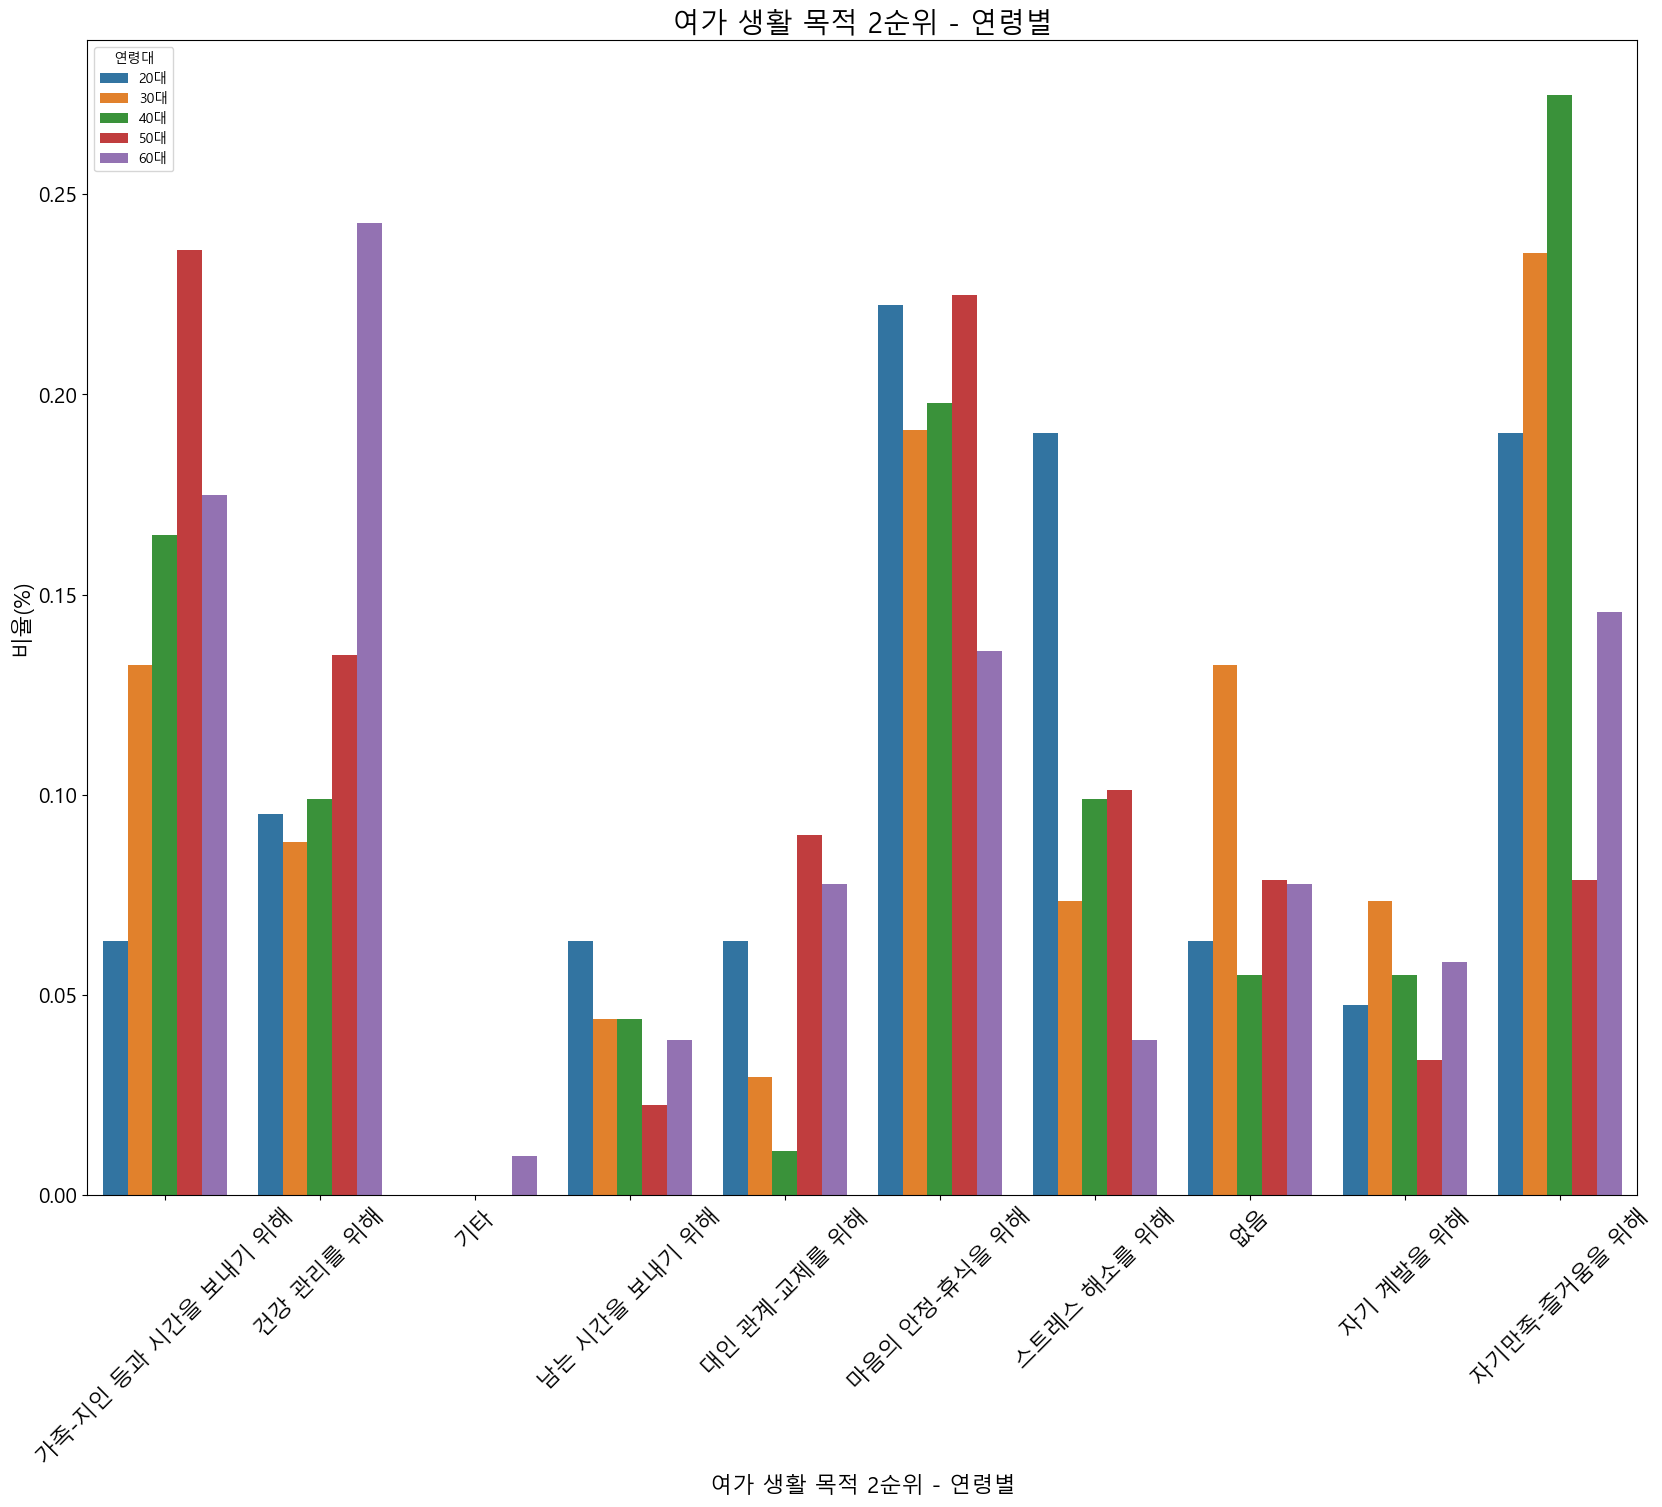

In [257]:
# 각 연령대별 비율로 계산
data_leisure_2 = data_2[["연령대", "여가목적_2"]]
data_leisure_2 = pd.DataFrame(data_leisure_2.groupby(['연령대']).value_counts()).reset_index()
data_leisure_2 = data_leisure_2.rename(columns = {0 : "value"})
data_leisure_2.loc[data_leisure_2.연령대=="20대","value"] = data_leisure_2[data_leisure_2.연령대=="20대"].value/data_Age[data_Age.연령대 == "20대"].total.values
data_leisure_2.loc[data_leisure_2.연령대=="30대","value"] = data_leisure_2[data_leisure_2.연령대=="30대"].value/data_Age[data_Age.연령대 == "30대"].total.values
data_leisure_2.loc[data_leisure_2.연령대=="40대","value"] = data_leisure_2[data_leisure_2.연령대=="40대"].value/data_Age[data_Age.연령대 == "40대"].total.values
data_leisure_2.loc[data_leisure_2.연령대=="50대","value"] = data_leisure_2[data_leisure_2.연령대=="50대"].value/data_Age[data_Age.연령대 == "50대"].total.values
data_leisure_2.loc[data_leisure_2.연령대=="60대","value"] = data_leisure_2[data_leisure_2.연령대=="60대"].value/data_Age[data_Age.연령대 == "60대"].total.values

x_name = ['가족-지인 등과 시간을 보내기 위해', '건강 관리를 위해', '남는 시간을 보내기 위해',
       '대인 관계-교제를 위해', '마음의 안정-휴식을 위해', '스트레스 해소를 위해','자기 계발을 위해',
       '자기만족-즐거움을 위해']
plt.figure(figsize=(20,15))
sns.barplot(x="여가목적_2", y="value", hue = "연령대",data=data_leisure_2)
plt.rc('ytick', labelsize=15) 
plt.xticks(list(range(len(le.classes_))), le.classes_, fontsize=16, rotation = 45)
plt.xlabel("여가 생활 목적 2순위 - 연령별", fontsize = 16)
plt.ylabel("비율(%)", fontsize = 16)
plt.title("여가 생활 목적 2순위 - 연령별", fontsize = 20)

In [258]:
le_2 = LabelEncoder()
le_2.fit(data.성별)
data_2.성별 = le_2.transform(data_2.성별)

le_3 = LabelEncoder()
le_3.fit(data.연령대)
data_2.연령대 = le_3.transform(data_2.연령대)

In [259]:
from kmodes.kmodes import KModes

In [291]:
data = data.reset_index(drop = True)
data_2 = data_2.reset_index(drop = True)

In [298]:
data[(data.연령대 == "30대")]

,성별,연령대,소득,중요도,여가목적_1,여가목적_2,평일여가시간,주말여가시간
0,M,30대,300이상500만원 미만,보통이다,스트레스 해소를 위해,가족-지인 등과 시간을 보내기 위해,2,3
16,F,30대,300이상500만원 미만,매우 중요하다,스트레스 해소를 위해,자기만족-즐거움을 위해,2,4
21,M,30대,700만원 이상,보통이다,가족-지인 등과 시간을 보내기 위해,없음,0,6
40,M,30대,300만원 미만,중요한 편이다,마음의 안정-휴식을 위해,자기만족-즐거움을 위해,1,3
52,F,30대,700만원 이상,중요한 편이다,가족-지인 등과 시간을 보내기 위해,없음,2,4
...,...,...,...,...,...,...,...,...
385,F,30대,700만원 이상,중요한 편이다,스트레스 해소를 위해,자기 계발을 위해,3,2
392,M,30대,500이상700만원 미만,매우 중요하다,스트레스 해소를 위해,자기만족-즐거움을 위해,0,2
395,M,30대,300만원 미만,중요한 편이다,마음의 안정-휴식을 위해,자기 계발을 위해,10,10
404,M,30대,700만원 이상,중요한 편이다,가족-지인 등과 시간을 보내기 위해,건강 관리를 위해,2,6


In [296]:

data_2.loc[[412, 116, 7],]

,성별,연령대,소득,중요도,여가목적_1,여가목적_2
412,0,4,2,4,1,8
116,1,0,0,4,6,5
7,0,2,1,4,0,5


In [299]:
cate = ["성별", "연령대","소득", "중요도","여가목적_1","여가목적_2"]
data_2 = data_2[cate]
kmodes = KModes(n_clusters=4, init = data_2.loc[[412, 116, 7, 392],]) ## 클래스 초기화
kmodes.fit(data_2)
print(kmodes.predict(data_2))

[3 2 2 2 0 1 0 2 0 0 1 1 0 0 1 1 3 0 1 0 0 3 1 0 2 0 1 1 3 1 0 2 2 1 1 2 0
 2 0 0 1 0 2 3 0 0 1 2 0 3 0 2 0 0 0 2 1 1 0 0 0 3 2 1 1 0 0 0 1 0 1 0 0 3
 0 2 3 2 3 2 0 1 1 0 1 1 1 3 1 0 2 0 3 2 0 1 2 1 0 3 1 1 2 0 3 3 0 0 0 0 0
 0 0 0 0 2 1 1 1 0 3 1 0 0 0 0 2 3 0 2 0 3 0 0 0 0 0 0 2 1 0 2 3 3 0 1 0 0
 0 0 0 0 2 3 0 1 0 3 0 0 2 1 3 2 0 2 3 3 0 0 0 2 2 2 3 0 1 1 0 0 0 3 3 0 0
 1 1 3 1 0 2 2 0 0 1 0 0 1 0 1 0 0 0 0 1 2 3 0 0 0 0 3 0 3 2 1 0 0 1 0 1 2
 0 0 0 0 1 1 3 3 0 3 1 0 0 0 0 2 0 2 1 3 0 0 2 0 2 2 2 3 0 0 0 3 0 1 0 1 2
 2 0 2 0 1 2 0 0 1 1 0 0 1 0 2 2 0 3 0 0 3 0 2 3 0 0 0 2 0 1 2 0 0 3 1 3 1
 0 1 2 3 3 1 1 1 3 2 0 0 2 1 0 2 0 0 2 0 0 0 2 0 1 3 1 2 0 0 0 0 0 1 0 0 1
 3 0 0 3 0 0 1 0 0 2 0 1 0 1 3 3 1 1 0 2 1 0 2 1 3 1 1 2 3 0 1 1 0 1 1 1 0
 0 1 1 3 0 1 0 0 1 0 2 0 2 1 0 0 0 0 0 1 0 1 3 3 2 1 3 0 2 0 1 1 2 0 3 3 0
 1 0 0 1 1 0 2]


In [300]:
import numpy as np
result = pd.concat([data_2[["성별","연령대"]].reset_index(drop=True), pd.DataFrame(kmodes.predict(data_2)).reset_index(drop=True)], axis =1)
result = result.rename(columns = {0:"cluster"})
result.성별 = result.성별 + np.random.normal(0,0.1,size=414)
result.연령대 = result.연령대 + np.random.normal(0,0.1,size=414)

C:\Users\whfhr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


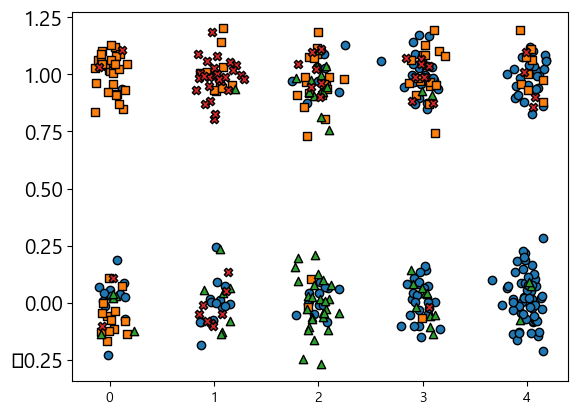

In [301]:
target_list = np.unique(result.cluster)
markers=['o', 's', '^', 'X']
for target in target_list:
    target_cluster = result[result['cluster'] == target]
    plt.scatter(x=target_cluster['연령대'], y=target_cluster['성별'], 
                edgecolor='k', marker=markers[target] )
    
plt.show()

C:\Users\whfhr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


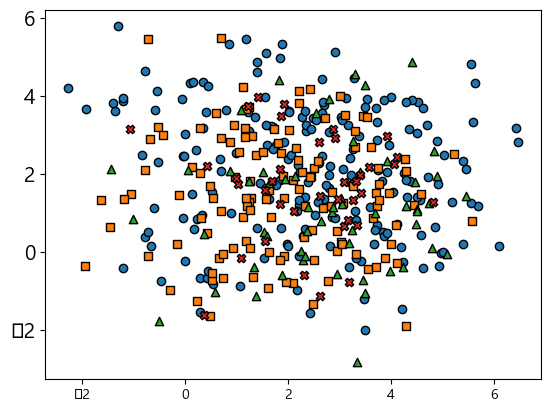

In [228]:
result = pd.concat([data_2[["소득","연령대"]].reset_index(drop=True), pd.DataFrame(kmodes.predict(data_2)).reset_index(drop=True)], axis =1)
result = result.rename(columns = {0:"cluster"})
result.소득 = result.소득 + np.random.normal(size=414)
result.연령대 = result.연령대 + np.random.normal(size=414)

target_list = np.unique(result.cluster)
markers=['o', 's', '^', 'X']
for target in target_list:
    target_cluster = result[result['cluster'] == target]
    plt.scatter(x=target_cluster['연령대'], y=target_cluster['소득'], 
                edgecolor='k', marker=markers[target] )
    
plt.show()

In [240]:
from collections import Counter
Counter(result.cluster)

Counter({1: 126, 0: 194, 3: 37, 2: 57})

In [243]:
data

,성별,연령대,소득,중요도,여가목적_1,여가목적_2,평일여가시간,주말여가시간
0,M,30대,1,3,6,0,2,3
1,F,40대,3,4,4,5,1,3
2,F,50대,2,5,0,4,10,12
3,M,40대,3,4,0,5,1,5
5,F,50대,0,4,9,1,1,1
...,...,...,...,...,...,...,...,...
509,M,50대,3,4,8,0,4,8
511,M,20대,4,3,9,6,1,5
514,M,50대,3,4,5,3,3,8
518,F,60대,2,4,1,8,3,10


In [242]:
result[result.cluster==2].index

Int64Index([ 10,  13,  17,  18,  39,  44,  66,  69,  82,  86,  98,  99, 101,
            106, 113, 114, 118, 128, 143, 148, 155, 170, 184, 185, 189, 200,
            204, 208, 209, 232, 235, 241, 257, 260, 263, 267, 268, 278, 296,
            299, 300, 309, 312, 313, 326, 327, 332, 334, 335, 343, 344, 359,
            370, 378, 386, 387, 400],
           dtype='int64')